In [ ]:
!unzip /content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/train/uncropped/train_set.zip

Archive:  /content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/train/uncropped/train_set.zip
   creating: train_set/
  inflating: train_set/29283.jpeg    
  inflating: train_set/18927.jpeg    
  inflating: train_set/2839.jpeg     
  inflating: train_set/1716.jpeg     
  inflating: train_set/30558.jpeg    
  inflating: train_set/32565.jpeg    
  inflating: train_set/11205.jpeg    
  inflating: train_set/9326.jpeg     
  inflating: train_set/13238.jpeg    
  inflating: train_set/26176.jpeg    
  inflating: train_set/23374.jpeg    
  inflating: train_set/21349.jpeg    
  inflating: train_set/14007.jpeg    
  inflating: train_set/723.jpeg      
  inflating: train_set/4514.jpeg     
  inflating: train_set/6529.jpeg     
  inflating: train_set/29779.jpeg    
  inflating: train_set/34848.jpeg    
  inflating: train_set/30108.jpeg    
  inflating: train_set/1346.jpeg     
  inflating: train_set/19265.jpeg    
  inflating: train_set/8864.jpeg     
  inflating: train_set/26526.jpeg    

In [ ]:
!python3 /content/drive/MyDrive/Owen/save_prediction_maps.py "/content/drive/MyDrive/Owen/resnet2_output/epoch47" "/content/train_set/train.csv" "/content/train_set/" "/content/drive/MyDrive/Owen/prediction_maps/"

  0% 0/32710 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 32710/32710 [1:28:58<00:00,  6.13it/s]


In [ ]:
!pip3 install torch==1.6.0 torchvision==0.7.0

In [1]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 5.7MB 661kB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 112kB 30.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=33c07f484c7df42cbd3293d807da3030d40597fb08d40802ed737919fe6ab300
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=425a6cad2e7e554e67a30e6964beb63584ea7703af1b477d496c5723cdecb309
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built fvcore antlr4-python3-runtime


In [3]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

from imutils import paths

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, BCELoss, Sequential, Conv2d, AvgPool2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Sigmoid
from torch.optim import Adam, SGD

import os
import joblib
import torch
import random
import albumentations
import matplotlib.pyplot as plt
import argparse
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from PIL import Image
from tqdm import tqdm
from torchvision import models as models
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
from google.colab.patches import cv2_imshow
import requests
import cv2


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
# Load model cfg and weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_cafdb1.pkl: 261MB [00:22, 11.4MB/s]                           


In [51]:
def get_road(path):
  im = cv2.imread(path)
  panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
  new_dict = {}
  for item in segments_info:
   category_id = item['category_id']
   if category_id == 21:
     id = item['id']
  road = (panoptic_seg==id)
  return road

(<matplotlib.axes._subplots.AxesSubplot at 0x7f44da336810>,
 <matplotlib.image.AxesImage at 0x7f44da4d4350>)

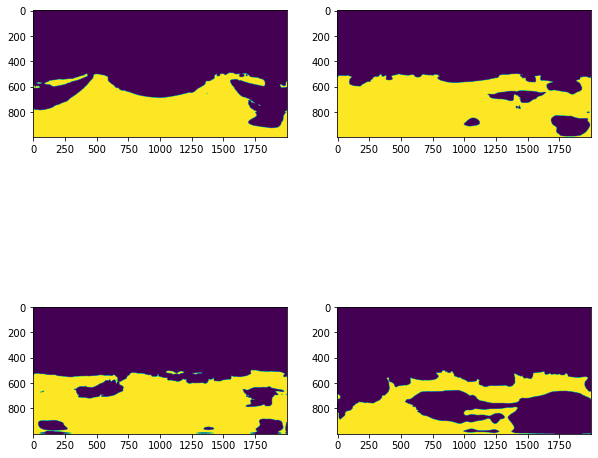

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(get_road("/content/train_set/1000.jpeg").cpu())
plt.subplot(222), plt.imshow(get_road("/content/train_set/1200.jpeg").cpu())
plt.subplot(223), plt.imshow(get_road("/content/train_set/1300.jpeg").cpu())
plt.subplot(224), plt.imshow(get_road("/content/train_set/1400.jpeg").cpu())

In [ ]:
labelled_data = pd.read_csv("/content/train_set/train.csv")

In [ ]:
labelled_data = labelled_data.drop("Unnamed: 0", axis="columns")
labelled_data = labelled_data.rename(columns={'Unnamed: 0.1':'image_name'})

In [ ]:
labelled_data['image_path'] = "/content/train_set/" + labelled_data['image_name'].astype(str) + ".jpeg"

In [ ]:
labelled_data['tensor_path'] = "/content/drive/MyDrive/Owen/prediction_maps/" + labelled_data['image_name'].astype(str) + ".pt"

In [ ]:
gss = GroupShuffleSplit(n_splits=2, train_size=0.8/0.9, random_state=42)
gss.get_n_splits()
groups = np.array(labelled_data["road_id"])

In [ ]:
train,test = next(gss.split(X = labelled_data, groups = groups))

In [ ]:
xtrain = labelled_data.iloc[train].tensor_path.values
xtest = labelled_data.iloc[test].tensor_path.values
ytrain = labelled_data.iloc[train].cracking_binary.values
ytest = labelled_data.iloc[test].cracking_binary.values

In [ ]:
# image dataset module
class prediction_maps(Dataset):
    def __init__(self, path, labels, tfms=None):
        self.X = path
        self.y = labels

    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        tensor = torch.load(self.X[i])
        tensor = F.interpolate(tensor,[224,224]).squeeze(dim=0)
        label = self.y[i]
        return tensor, torch.tensor(label, dtype=torch.long)

In [ ]:
train_data = prediction_maps(xtrain, ytrain, tfms=1)
test_data = prediction_maps(xtest, ytest, tfms=0)
 
# dataloaders
trainloader = DataLoader(train_data, batch_size=100, shuffle=True)
testloader = DataLoader(test_data, batch_size=100, shuffle=False)

(<matplotlib.axes._subplots.AxesSubplot at 0x7faef5174c90>,
 <matplotlib.image.AxesImage at 0x7faef519e110>)

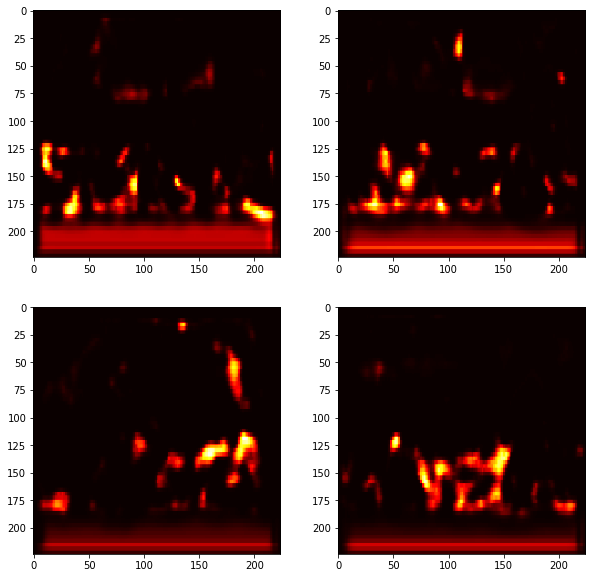

In [ ]:
# visualizing images
i = 10000
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(1/(1+np.exp(-train_data[i][0].squeeze().cpu())), cmap='hot')
plt.subplot(222), plt.imshow(1/(1+np.exp(-train_data[i+25][0].squeeze().cpu())), cmap='hot')
plt.subplot(223), plt.imshow(1/(1+np.exp(-train_data[i+50][0].squeeze().cpu())), cmap='hot')
plt.subplot(224), plt.imshow(1/(1+np.exp(-train_data[i+75][0].squeeze().cpu())), cmap='hot')

In [ ]:
class final_layers(nn.Module):
    def __init__(self):
        super(final_layers, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layers(x)
        return x.squeeze()

In [ ]:
# defining the model
model = models.resnet34(pretrained=False)
# defining the optimizer
model.fc = final_layers()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
optimizer = Adam(model.parameters(), lr=0.00003)
# defining the loss function
criterion = BCELoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
''' SEED Everything '''
def seed_everything(SEED=42):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True 
SEED=42
seed_everything(SEED=SEED)
''' SEED Everything '''
# set computation device
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")

Computation device: cuda:0


In [ ]:
#validation function
def validate(model, test_dataloader):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(test_dataloader), total=int(len(test_data)/test_dataloader.batch_size)):
            data, target = data[0].to(device), data[1].to(device)
            outputs = model(data)
            loss = criterion(outputs.float(), target.float())
            val_running_loss += loss.item()
            preds = torch.round(outputs.data)
            val_running_correct += (preds == target).sum().item()
            true_positives += ((preds == 1)&(target == 1)).sum().item()
            true_negatives += ((preds == 0)&(target == 0)).sum().item()
            false_positives += ((preds == 1)&(target == 0)).sum().item()
            false_negatives += ((preds == 0)&(target == 1)).sum().item()
        
        try:
          precision = true_positives/(true_positives+false_positives)
          recall = true_positives/(true_positives+false_negatives)
          f1 = 2 * (precision*recall)/(precision+recall)
        except:
          f1 = 0
          precision = 0
          recall = 0
        val_loss = val_running_loss/int(len(test_data)/test_dataloader.batch_size)
        val_accuracy = 100. * val_running_correct/len(test_dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}')
        print(f"Recall: {recall:.4f}, Precision: {precision:.2f}, F1: {f1:.2f}")
        
        return val_loss, val_accuracy, f1

In [ ]:
# training function
def fit(model, train_dataloader):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for i, data in tqdm(enumerate(train_dataloader), total=int(len(train_data)/train_dataloader.batch_size)):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs.float(), target.float())
        train_running_loss += loss.item()
        preds = torch.round(outputs.data)
        train_running_correct += (preds == target).sum().item()
        true_positives += ((preds == 1)&(target == 1)).sum().item()
        true_negatives += ((preds == 0)&(target == 0)).sum().item()
        false_positives += ((preds == 1)&(target == 0)).sum().item()
        false_negatives += ((preds == 0)&(target == 1)).sum().item()
        loss.backward()
        optimizer.step()
    try:
      precision = true_positives/(true_positives+false_positives)
      recall = true_positives/(true_positives+false_negatives)
      f1 = 2 * (precision*recall)/(precision+recall)
    except:
      precision = 0
      recall = 0
      f1 = 0
    train_loss = train_running_loss/int(len(train_data)/train_dataloader.batch_size)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}")
    print(f"Recall: {recall:.4f}, Precision: {precision:.2f}, F1: {f1:.2f}")
    
    return train_loss, train_accuracy, f1

In [ ]:
train_loss , train_accuracy , train_f1 = [], [], []
val_loss , val_accuracy, val_f1 = [], [], []
start = time.time()
epochs = 75
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy, train_epoch_f1 = fit(model, trainloader)
    val_epoch_loss, val_epoch_accuracy, val_epoch_f1 = validate(model, testloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    train_f1.append(train_epoch_f1)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    val_f1.append(val_epoch_f1)
    path = "/content/drive/MyDrive/Owen/output/epoch" + str(epoch)
    torch.save(model.state_dict(), path)
end = time.time()
print(f"{(end-start)/60:.3f} minutes")





  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 1 of 75
Training






  0%|          | 1/292 [00:00<01:40,  2.89it/s]



  1%|          | 2/292 [00:00<01:33,  3.11it/s]



  1%|          | 3/292 [00:00<01:34,  3.06it/s]



  1%|▏         | 4/292 [00:01<01:35,  3.00it/s]



  2%|▏         | 5/292 [00:01<01:36,  2.98it/s]



  2%|▏         | 6/292 [00:01<01:36,  2.96it/s]



  2%|▏         | 7/292 [00:02<01:36,  2.95it/s]



  3%|▎         | 8/292 [00:02<01:36,  2.96it/s]



  3%|▎         | 9/292 [00:03<01:36,  2.94it/s]



  3%|▎         | 10/292 [00:03<01:36,  2.93it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.93it/s]



  4%|▍         | 12/292 [00:04<01:35,  2.93it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.95it/s]



  5%|▍         | 14/292 [00:04<01:33,  2.96it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.94it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:31,  2.98it/s]



  7%|▋         | 

Train Loss: 0.5707, Train Acc: 70.67
Recall: 0.3858, Precision: 0.63, F1: 0.48
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.40it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.80it/s]



  9%|▉         | 3/34 [00:00<00:06,  5.08it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.23it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.39it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.47it/s]



 21%|██        | 7/34 [00:01<00:04,  5.54it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.58it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.66it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.77it/s]



 32%|███▏      | 11/34 [00:01<00:03,  5.76it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.73it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.80it/s]



 41%|████      | 14/34 [00:02<00:03,  5.80it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.88it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.83it/s]



 50%|█████     | 17/34 [00:02<00:02,  5.90it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.89it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.91it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.5553, Val Acc: 74.54
Recall: 0.4002, Precision: 0.64, F1: 0.49






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 2 of 75
Training






  0%|          | 1/292 [00:00<01:15,  3.88it/s]



  1%|          | 2/292 [00:00<01:22,  3.53it/s]



  1%|          | 3/292 [00:00<01:27,  3.29it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.20it/s]



  2%|▏         | 5/292 [00:01<01:31,  3.12it/s]



  2%|▏         | 6/292 [00:01<01:32,  3.09it/s]



  2%|▏         | 7/292 [00:02<01:33,  3.04it/s]



  3%|▎         | 8/292 [00:02<01:33,  3.03it/s]



  3%|▎         | 9/292 [00:02<01:33,  3.01it/s]



  3%|▎         | 10/292 [00:03<01:33,  3.00it/s]



  4%|▍         | 11/292 [00:03<01:33,  3.00it/s]



  4%|▍         | 12/292 [00:03<01:33,  3.00it/s]



  4%|▍         | 13/292 [00:04<01:33,  2.99it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.95it/s]



  5%|▌         | 15/292 [00:05<01:35,  2.91it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.93it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.95it/s]



  7%|▋         | 

Train Loss: 0.3442, Train Acc: 85.49
Recall: 0.7461, Precision: 0.82, F1: 0.78
Validating






  3%|▎         | 1/34 [00:00<00:08,  4.07it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.49it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.83it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.09it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.26it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.32it/s]



 21%|██        | 7/34 [00:01<00:04,  5.51it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.56it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.68it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.75it/s]



 32%|███▏      | 11/34 [00:01<00:03,  5.77it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.79it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.72it/s]



 41%|████      | 14/34 [00:02<00:03,  5.80it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.85it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.77it/s]



 50%|█████     | 17/34 [00:02<00:02,  5.82it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.81it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.77it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.6330, Val Acc: 72.08
Recall: 0.6198, Precision: 0.54, F1: 0.58






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 3 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.80it/s]



  1%|          | 2/292 [00:00<01:23,  3.48it/s]



  1%|          | 3/292 [00:00<01:27,  3.29it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.20it/s]



  2%|▏         | 5/292 [00:01<01:31,  3.12it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.06it/s]



  2%|▏         | 7/292 [00:02<01:33,  3.03it/s]



  3%|▎         | 8/292 [00:02<01:33,  3.03it/s]



  3%|▎         | 9/292 [00:02<01:33,  3.03it/s]



  3%|▎         | 10/292 [00:03<01:33,  3.03it/s]



  4%|▍         | 11/292 [00:03<01:33,  3.02it/s]



  4%|▍         | 12/292 [00:03<01:33,  3.00it/s]



  4%|▍         | 13/292 [00:04<01:33,  3.00it/s]



  5%|▍         | 14/292 [00:04<01:32,  2.99it/s]



  5%|▌         | 15/292 [00:04<01:33,  2.96it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.96it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 18/292 [00:05<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.95it/s]



  7%|▋         | 

Train Loss: 0.0953, Train Acc: 96.74
Recall: 0.9503, Precision: 0.96, F1: 0.95
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.32it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.64it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.91it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.14it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.32it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.49it/s]



 21%|██        | 7/34 [00:01<00:04,  5.55it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.64it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.63it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.65it/s]



 32%|███▏      | 11/34 [00:01<00:04,  5.67it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.66it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.74it/s]



 41%|████      | 14/34 [00:02<00:03,  5.64it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.64it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.59it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.57it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.62it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.70it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 2.0923, Val Acc: 70.47
Recall: 0.0466, Precision: 0.89, F1: 0.09






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 4 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.82it/s]



  1%|          | 2/292 [00:00<01:23,  3.47it/s]



  1%|          | 3/292 [00:00<01:28,  3.28it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.16it/s]



  2%|▏         | 5/292 [00:01<01:33,  3.08it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.05it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.02it/s]



  3%|▎         | 8/292 [00:02<01:35,  2.98it/s]



  3%|▎         | 9/292 [00:03<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.94it/s]



  4%|▍         | 12/292 [00:04<01:36,  2.90it/s]



  4%|▍         | 13/292 [00:04<01:36,  2.89it/s]



  5%|▍         | 14/292 [00:04<01:35,  2.91it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.93it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.96it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.97it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 

Train Loss: 0.0491, Train Acc: 98.73
Recall: 0.9789, Precision: 0.98, F1: 0.98
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.23it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.52it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.83it/s]



 12%|█▏        | 4/34 [00:00<00:06,  4.94it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.06it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.12it/s]



 21%|██        | 7/34 [00:01<00:05,  5.12it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.27it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.30it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.40it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.45it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.48it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.50it/s]



 41%|████      | 14/34 [00:02<00:03,  5.57it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.56it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.54it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.53it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.59it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.57it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.9653, Val Acc: 74.04
Recall: 0.4696, Precision: 0.60, F1: 0.53






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 5 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.82it/s]



  1%|          | 2/292 [00:00<01:23,  3.48it/s]



  1%|          | 3/292 [00:00<01:27,  3.30it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.19it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.11it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.05it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.00it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:35,  2.96it/s]



  4%|▍         | 11/292 [00:03<01:36,  2.90it/s]



  4%|▍         | 12/292 [00:04<01:36,  2.89it/s]



  4%|▍         | 13/292 [00:04<01:36,  2.90it/s]



  5%|▍         | 14/292 [00:04<01:35,  2.91it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.92it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.93it/s]



  6%|▌         | 17/292 [00:05<01:34,  2.92it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 

Train Loss: 0.0246, Train Acc: 99.69
Recall: 0.9953, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:08,  3.94it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.30it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.63it/s]



 12%|█▏        | 4/34 [00:00<00:06,  4.81it/s]



 15%|█▍        | 5/34 [00:00<00:05,  4.98it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.11it/s]



 21%|██        | 7/34 [00:01<00:05,  5.06it/s]



 24%|██▎       | 8/34 [00:01<00:05,  5.12it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.08it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.15it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.19it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.20it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.26it/s]



 41%|████      | 14/34 [00:02<00:03,  5.35it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.45it/s]



 47%|████▋     | 16/34 [00:03<00:03,  5.53it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.55it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.57it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.70it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.1573, Val Acc: 67.78
Recall: 0.7006, Precision: 0.48, F1: 0.57






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 6 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.78it/s]



  1%|          | 2/292 [00:00<01:23,  3.47it/s]



  1%|          | 3/292 [00:00<01:27,  3.30it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.20it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.11it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.06it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 9/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 10/292 [00:03<01:35,  2.97it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.95it/s]



  4%|▍         | 12/292 [00:04<01:35,  2.94it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.94it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.93it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.93it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 

Train Loss: 0.0183, Train Acc: 99.87
Recall: 0.9976, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.22it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.60it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.81it/s]



 12%|█▏        | 4/34 [00:00<00:06,  4.95it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.03it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.12it/s]



 21%|██        | 7/34 [00:01<00:05,  5.18it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.27it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.35it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.35it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.44it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.39it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.40it/s]



 41%|████      | 14/34 [00:02<00:03,  5.43it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.38it/s]



 47%|████▋     | 16/34 [00:03<00:03,  5.37it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.35it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.42it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.47it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.9967, Val Acc: 72.31
Recall: 0.6302, Precision: 0.54, F1: 0.58






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 7 of 75
Training






  0%|          | 1/292 [00:00<01:20,  3.62it/s]



  1%|          | 2/292 [00:00<01:26,  3.36it/s]



  1%|          | 3/292 [00:00<01:30,  3.20it/s]



  1%|▏         | 4/292 [00:01<01:33,  3.09it/s]



  2%|▏         | 5/292 [00:01<01:34,  3.04it/s]



  2%|▏         | 6/292 [00:02<01:34,  3.01it/s]



  2%|▏         | 7/292 [00:02<01:35,  2.97it/s]



  3%|▎         | 8/292 [00:02<01:36,  2.95it/s]



  3%|▎         | 9/292 [00:03<01:36,  2.93it/s]



  3%|▎         | 10/292 [00:03<01:36,  2.93it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.95it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.96it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.94it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.96it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.93it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 

Train Loss: 0.0294, Train Acc: 99.92
Recall: 0.9988, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.39it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.71it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.98it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.12it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.24it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.33it/s]



 21%|██        | 7/34 [00:01<00:05,  5.38it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.41it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.50it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.59it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.62it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.60it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.61it/s]



 41%|████      | 14/34 [00:02<00:03,  5.62it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.63it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.61it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.61it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.63it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.59it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.1251, Val Acc: 69.86
Recall: 0.7177, Precision: 0.51, F1: 0.59






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 8 of 75
Training






  0%|          | 1/292 [00:00<01:17,  3.75it/s]



  1%|          | 2/292 [00:00<01:23,  3.47it/s]



  1%|          | 3/292 [00:00<01:28,  3.28it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.18it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.09it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.04it/s]



  2%|▏         | 7/292 [00:02<01:33,  3.03it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 12/292 [00:03<01:33,  2.98it/s]



  4%|▍         | 13/292 [00:04<01:33,  2.97it/s]



  5%|▍         | 14/292 [00:04<01:33,  2.96it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.94it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.93it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 

Train Loss: 0.0308, Train Acc: 99.92
Recall: 0.9992, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.34it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.67it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.93it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.13it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.27it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.28it/s]



 21%|██        | 7/34 [00:01<00:05,  5.35it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.40it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.50it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.51it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.51it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.43it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.37it/s]



 41%|████      | 14/34 [00:02<00:03,  5.30it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.38it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.52it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.55it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.55it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.56it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.0052, Val Acc: 75.36
Recall: 0.5228, Precision: 0.62, F1: 0.57






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 9 of 75
Training






  0%|          | 1/292 [00:00<01:19,  3.67it/s]



  1%|          | 2/292 [00:00<01:25,  3.41it/s]



  1%|          | 3/292 [00:00<01:29,  3.24it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.13it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.09it/s]



  2%|▏         | 6/292 [00:01<01:34,  3.02it/s]



  2%|▏         | 7/292 [00:02<01:35,  2.98it/s]



  3%|▎         | 8/292 [00:02<01:35,  2.96it/s]



  3%|▎         | 9/292 [00:03<01:37,  2.90it/s]



  3%|▎         | 10/292 [00:03<01:36,  2.92it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.93it/s]



  4%|▍         | 12/292 [00:04<01:35,  2.93it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.95it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.94it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.93it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:31,  2.98it/s]



  7%|▋         | 19/292 [00:06<01:31,  2.98it/s]



  7%|▋         | 

Train Loss: 0.0177, Train Acc: 99.84
Recall: 0.9970, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.35it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.65it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.94it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.13it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.27it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.39it/s]



 21%|██        | 7/34 [00:01<00:04,  5.42it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.51it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.58it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.59it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.55it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.55it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.56it/s]



 41%|████      | 14/34 [00:02<00:03,  5.61it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.62it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.58it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.59it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.59it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.58it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.1983, Val Acc: 74.95
Recall: 0.3517, Precision: 0.68, F1: 0.46






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 10 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.82it/s]



  1%|          | 2/292 [00:00<01:22,  3.51it/s]



  1%|          | 3/292 [00:00<01:27,  3.31it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.19it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.12it/s]



  2%|▏         | 6/292 [00:01<01:32,  3.08it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.03it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 9/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.96it/s]



  4%|▍         | 12/292 [00:03<01:34,  2.96it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.95it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.95it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.94it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.93it/s]



  6%|▌         | 17/292 [00:05<01:34,  2.92it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.93it/s]



  7%|▋         | 

Train Loss: 0.1042, Train Acc: 96.07
Recall: 0.9369, Precision: 0.95, F1: 0.94
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.26it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.60it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.89it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.14it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.29it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.37it/s]



 21%|██        | 7/34 [00:01<00:04,  5.41it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.50it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.59it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.61it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.58it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.64it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.62it/s]



 41%|████      | 14/34 [00:02<00:03,  5.63it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.54it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.58it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.66it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.67it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.68it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.8452, Val Acc: 73.90
Recall: 0.4610, Precision: 0.60, F1: 0.52






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 11 of 75
Training






  0%|          | 1/292 [00:00<01:19,  3.66it/s]



  1%|          | 2/292 [00:00<01:25,  3.37it/s]



  1%|          | 3/292 [00:00<01:29,  3.21it/s]



  1%|▏         | 4/292 [00:01<01:32,  3.11it/s]



  2%|▏         | 5/292 [00:01<01:34,  3.05it/s]



  2%|▏         | 6/292 [00:01<01:34,  3.03it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:35,  2.98it/s]



  3%|▎         | 9/292 [00:03<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.96it/s]



  4%|▍         | 13/292 [00:04<01:33,  2.97it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.94it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.92it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.95it/s]



  7%|▋         | 

Train Loss: 0.0697, Train Acc: 97.49
Recall: 0.9607, Precision: 0.97, F1: 0.96
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.18it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.55it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.81it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.03it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.16it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.33it/s]



 21%|██        | 7/34 [00:01<00:05,  5.39it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.47it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.53it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.60it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.60it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.56it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.58it/s]



 41%|████      | 14/34 [00:02<00:03,  5.64it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.72it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.75it/s]



 50%|█████     | 17/34 [00:03<00:02,  5.73it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.72it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.69it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.3169, Val Acc: 74.51
Recall: 0.2529, Precision: 0.76, F1: 0.38






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 12 of 75
Training






  0%|          | 1/292 [00:00<01:17,  3.77it/s]



  1%|          | 2/292 [00:00<01:23,  3.46it/s]



  1%|          | 3/292 [00:00<01:27,  3.29it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.20it/s]



  2%|▏         | 5/292 [00:01<01:31,  3.13it/s]



  2%|▏         | 6/292 [00:01<01:32,  3.08it/s]



  2%|▏         | 7/292 [00:02<01:33,  3.04it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.00it/s]



  3%|▎         | 9/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.95it/s]



  4%|▍         | 12/292 [00:03<01:34,  2.97it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.96it/s]



  5%|▍         | 14/292 [00:04<01:33,  2.98it/s]



  5%|▌         | 15/292 [00:05<01:33,  2.96it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 17/292 [00:05<01:32,  2.96it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 

Train Loss: 0.0316, Train Acc: 99.02
Recall: 0.9832, Precision: 0.99, F1: 0.99
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.25it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.56it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.82it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.07it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.25it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.34it/s]



 21%|██        | 7/34 [00:01<00:05,  5.39it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.43it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.43it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.43it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.47it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.47it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.49it/s]



 41%|████      | 14/34 [00:02<00:03,  5.56it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.58it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.59it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.57it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.61it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.65it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.0676, Val Acc: 73.40
Recall: 0.5703, Precision: 0.57, F1: 0.57






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 13 of 75
Training






  0%|          | 1/292 [00:00<01:15,  3.84it/s]



  1%|          | 2/292 [00:00<01:23,  3.47it/s]



  1%|          | 3/292 [00:00<01:28,  3.26it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.18it/s]



  2%|▏         | 5/292 [00:01<01:31,  3.13it/s]



  2%|▏         | 6/292 [00:01<01:32,  3.10it/s]



  2%|▏         | 7/292 [00:02<01:33,  3.04it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.97it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.96it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.97it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.94it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.96it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.94it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 17/292 [00:05<01:34,  2.91it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 

Train Loss: 0.0151, Train Acc: 99.61
Recall: 0.9942, Precision: 0.99, F1: 0.99
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.15it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.49it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.79it/s]



 12%|█▏        | 4/34 [00:00<00:06,  4.95it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.16it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.22it/s]



 21%|██        | 7/34 [00:01<00:05,  5.36it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.45it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.50it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.49it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.58it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.58it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.63it/s]



 41%|████      | 14/34 [00:02<00:03,  5.64it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.63it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.62it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.65it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.54it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.54it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 0.9992, Val Acc: 75.33
Recall: 0.5466, Precision: 0.61, F1: 0.58






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 14 of 75
Training






  0%|          | 1/292 [00:00<01:16,  3.78it/s]



  1%|          | 2/292 [00:00<01:24,  3.45it/s]



  1%|          | 3/292 [00:00<01:28,  3.27it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.16it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.09it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.04it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:34,  3.00it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.98it/s]



  3%|▎         | 10/292 [00:03<01:35,  2.96it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.97it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.96it/s]



  5%|▍         | 14/292 [00:04<01:33,  2.96it/s]



  5%|▌         | 15/292 [00:05<01:33,  2.95it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.93it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.94it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.95it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.94it/s]



  7%|▋         | 

Train Loss: 0.0075, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.27it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.63it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.92it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.02it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.20it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.39it/s]



 21%|██        | 7/34 [00:01<00:04,  5.43it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.44it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.48it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.50it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.54it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.62it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.66it/s]



 41%|████      | 14/34 [00:02<00:03,  5.64it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.61it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.59it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.57it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.57it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.53it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.0950, Val Acc: 74.22
Recall: 0.5371, Precision: 0.59, F1: 0.56






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 15 of 75
Training






  0%|          | 1/292 [00:00<01:18,  3.69it/s]



  1%|          | 2/292 [00:00<01:24,  3.43it/s]



  1%|          | 3/292 [00:00<01:28,  3.27it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.16it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.09it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.05it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.02it/s]



  3%|▎         | 8/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.95it/s]



  3%|▎         | 10/292 [00:03<01:36,  2.93it/s]



  4%|▍         | 11/292 [00:03<01:35,  2.93it/s]



  4%|▍         | 12/292 [00:04<01:35,  2.93it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.94it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.95it/s]



  5%|▌         | 15/292 [00:05<01:35,  2.90it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.91it/s]



  6%|▌         | 17/292 [00:05<01:34,  2.92it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 

Train Loss: 0.0050, Train Acc: 99.86
Recall: 0.9978, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.28it/s]



  6%|▌         | 2/34 [00:00<00:06,  4.61it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.82it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.04it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.15it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.25it/s]



 21%|██        | 7/34 [00:01<00:05,  5.31it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.42it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.45it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.53it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.57it/s]



 35%|███▌      | 12/34 [00:02<00:03,  5.55it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.58it/s]



 41%|████      | 14/34 [00:02<00:03,  5.62it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.61it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.64it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.61it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.57it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.56it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.0791, Val Acc: 75.71
Recall: 0.5162, Precision: 0.63, F1: 0.57






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 16 of 75
Training






  0%|          | 1/292 [00:00<01:20,  3.62it/s]



  1%|          | 2/292 [00:00<01:26,  3.37it/s]



  1%|          | 3/292 [00:00<01:28,  3.25it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.15it/s]



  2%|▏         | 5/292 [00:01<01:33,  3.08it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.06it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 9/292 [00:02<01:35,  2.97it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.96it/s]



  4%|▍         | 12/292 [00:04<01:35,  2.94it/s]



  4%|▍         | 13/292 [00:04<01:35,  2.93it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.93it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.92it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.92it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.93it/s]



  6%|▌         | 18/292 [00:06<01:32,  2.95it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.96it/s]



  7%|▋         | 

Train Loss: 0.0030, Train Acc: 99.90
Recall: 0.9983, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:08,  4.09it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.46it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.79it/s]



 12%|█▏        | 4/34 [00:00<00:05,  5.02it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.20it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.24it/s]



 21%|██        | 7/34 [00:01<00:05,  5.31it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.36it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.40it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.44it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.41it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.48it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.51it/s]



 41%|████      | 14/34 [00:02<00:03,  5.44it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.44it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.45it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.50it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.47it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.53it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.1454, Val Acc: 75.45
Recall: 0.5561, Precision: 0.61, F1: 0.58






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 17 of 75
Training






  0%|          | 1/292 [00:00<01:17,  3.76it/s]



  1%|          | 2/292 [00:00<01:23,  3.45it/s]



  1%|          | 3/292 [00:00<01:27,  3.29it/s]



  1%|▏         | 4/292 [00:01<01:31,  3.15it/s]



  2%|▏         | 5/292 [00:01<01:32,  3.10it/s]



  2%|▏         | 6/292 [00:01<01:34,  3.03it/s]



  2%|▏         | 7/292 [00:02<01:35,  2.99it/s]



  3%|▎         | 8/292 [00:02<01:35,  2.99it/s]



  3%|▎         | 9/292 [00:02<01:34,  2.99it/s]



  3%|▎         | 10/292 [00:03<01:34,  2.99it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.98it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.97it/s]



  4%|▍         | 13/292 [00:04<01:34,  2.96it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.95it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.92it/s]



  5%|▌         | 16/292 [00:05<01:34,  2.93it/s]



  6%|▌         | 17/292 [00:05<01:34,  2.91it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.92it/s]



  7%|▋         | 19/292 [00:06<01:33,  2.91it/s]



  7%|▋         | 

Train Loss: 0.0022, Train Acc: 99.91
Recall: 0.9985, Precision: 1.00, F1: 1.00
Validating






  3%|▎         | 1/34 [00:00<00:07,  4.13it/s]



  6%|▌         | 2/34 [00:00<00:07,  4.45it/s]



  9%|▉         | 3/34 [00:00<00:06,  4.71it/s]



 12%|█▏        | 4/34 [00:00<00:06,  4.91it/s]



 15%|█▍        | 5/34 [00:00<00:05,  5.12it/s]



 18%|█▊        | 6/34 [00:01<00:05,  5.21it/s]



 21%|██        | 7/34 [00:01<00:05,  5.36it/s]



 24%|██▎       | 8/34 [00:01<00:04,  5.40it/s]



 26%|██▋       | 9/34 [00:01<00:04,  5.37it/s]



 29%|██▉       | 10/34 [00:01<00:04,  5.49it/s]



 32%|███▏      | 11/34 [00:02<00:04,  5.49it/s]



 35%|███▌      | 12/34 [00:02<00:04,  5.45it/s]



 38%|███▊      | 13/34 [00:02<00:03,  5.51it/s]



 41%|████      | 14/34 [00:02<00:03,  5.51it/s]



 44%|████▍     | 15/34 [00:02<00:03,  5.50it/s]



 47%|████▋     | 16/34 [00:02<00:03,  5.45it/s]



 50%|█████     | 17/34 [00:03<00:03,  5.43it/s]



 53%|█████▎    | 18/34 [00:03<00:02,  5.39it/s]



 56%|█████▌    | 19/34 [00:03<00:02,  5.48it/s]



 59%|█████▉    | 20/34 [00:03<00:02,

Val Loss: 1.1504, Val Acc: 75.15
Recall: 0.5437, Precision: 0.61, F1: 0.57






  0%|          | 0/292 [00:00<?, ?it/s]

Epoch 18 of 75
Training






  0%|          | 1/292 [00:00<01:18,  3.73it/s]



  1%|          | 2/292 [00:00<01:24,  3.44it/s]



  1%|          | 3/292 [00:00<01:28,  3.27it/s]



  1%|▏         | 4/292 [00:01<01:30,  3.17it/s]



  2%|▏         | 5/292 [00:01<01:33,  3.08it/s]



  2%|▏         | 6/292 [00:01<01:33,  3.06it/s]



  2%|▏         | 7/292 [00:02<01:34,  3.01it/s]



  3%|▎         | 8/292 [00:02<01:35,  2.98it/s]



  3%|▎         | 9/292 [00:03<01:35,  2.96it/s]



  3%|▎         | 10/292 [00:03<01:35,  2.96it/s]



  4%|▍         | 11/292 [00:03<01:34,  2.96it/s]



  4%|▍         | 12/292 [00:04<01:34,  2.97it/s]



  4%|▍         | 13/292 [00:04<01:35,  2.94it/s]



  5%|▍         | 14/292 [00:04<01:34,  2.94it/s]



  5%|▌         | 15/292 [00:05<01:34,  2.94it/s]



  5%|▌         | 16/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 17/292 [00:05<01:33,  2.95it/s]



  6%|▌         | 18/292 [00:06<01:33,  2.94it/s]



  7%|▋         | 19/292 [00:06<01:32,  2.95it/s]

KeyboardInterrupt: ignored

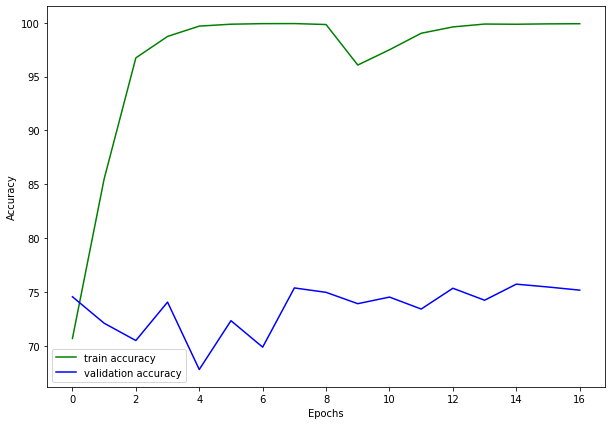

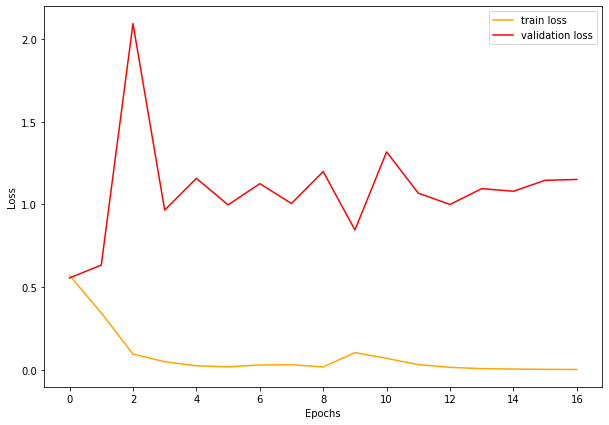

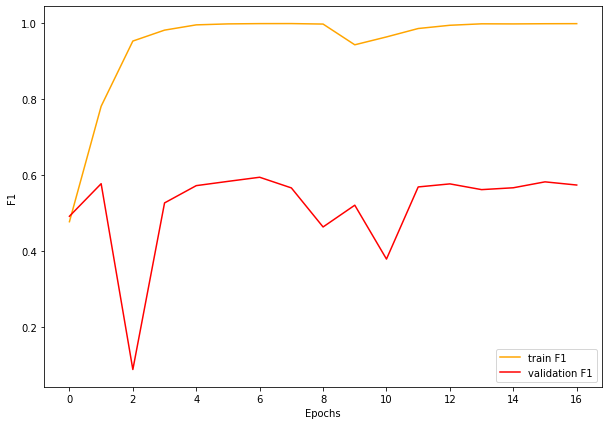

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/accuracy (2).png')
plt.show()
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/loss (2).png')
plt.show()
# F1 plots
plt.figure(figsize=(10, 7))
plt.plot(train_f1, color='orange', label='train F1')
plt.plot(val_f1, color='red', label='validation F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/F1 (2).png')
plt.show()

In [ ]:
results = pd.DataFrame({'Train Accuracy':train_accuracy,
                        'Validation Accuracy':val_accuracy,
                        'Train Loss':train_loss, 
                        'Validation Loss':val_loss,
                        'Train F1':train_f1,
                        'Validation F1':val_f1}, 
                         columns=['Train Accuracy','Validation Accuracy', 'Train Loss', 'Validation Loss',
                                  'Train F1', "Validation F1"])

In [ ]:
results.to_csv("/content/drive/MyDrive/Owen/final_results/second_cnn_no_mask_full_labels.csv")

In [ ]:
labelled_data['inspection_id'] = labelled_data['road_id'] + labelled_data['inspection_date']

In [ ]:
fulltestloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)
inspection_ids = labelled_data.iloc[test].inspection_id.unique()
inspections_x = labelled_data.iloc[test].inspection_id.values
inspections_y = labelled_data.loc[test,'cracking_binary'].groupby(by=inspections_x).max()

In [ ]:
from sklearn.metrics import f1_score
inspection_ids = labelled_data.iloc[test].inspection_id.unique()
inspections_x = labelled_data.iloc[test].inspection_id.values
inspections_y = labelled_data.loc[test,'cracking_binary'].groupby(by=inspections_x).max()
f1_scores_max = []
f1_scores_mean = []
f1_scores_majority = []
f1_scores_top2 = []
f1_scores_product = []
road_level = pd.DataFrame()
for a in range(15):
  print("Epoch: ", a)
  path = "/content/drive/MyDrive/Owen/output/epoch" + str(a)
  model.load_state_dict(torch.load(path))
  model.eval
  road_truths = []
  max_preds = []
  mean_preds = []
  majority_preds = []
  toptwo_preds = []
  product_preds = []
  for i,inspection in tqdm(enumerate(inspection_ids), total=len(inspection_ids)):
      images_x = xtest[inspections_x==inspection]
      images_y = ytest[inspections_x==inspection]
      test_data = prediction_maps(images_x, images_y, tfms=0)
      with torch.no_grad():
        test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)
        for i, data in enumerate(test_dataloader):
          data = data[0].to(device)
          outputs = model(data)
          road_truth = np.amax(images_y)
          max_pred = torch.round(torch.max(outputs.data)).item()
          mean_pred = torch.round(torch.mean(outputs.data)).item()
          majority_pred = torch.round(torch.mean(torch.round(outputs.data))).item()
          product_pred = torch.round(1-torch.prod(1-outputs.data)).item()
          if len(outputs.size())==0:
            top2_pred = torch.round(torch.max(outputs)).item()
          else:
            top2 = torch.topk(outputs, 2).values
            top2_pred = torch.round(torch.mean(top2)).item()
          road_truths.append(road_truth)
          max_preds.append(max_pred)
          mean_preds.append(mean_pred)
          majority_preds.append(majority_pred)
          toptwo_preds.append(top2_pred)
          product_preds.append(product_pred)
          road_level = road_level.append(pd.DataFrame([[a,inspection,
                                                        road_truth,torch.max(outputs.data).item(),
                                                        torch.mean(outputs.data).item(),
                                                        torch.mean(torch.round(outputs.data)).item(),
                                                        (1-torch.prod(1-outputs.data)).item()]]))
  f1_max = f1_score(road_truths, max_preds)
  f1_mean = f1_score(road_truths, mean_preds)
  f1_majority = f1_score(road_truths, majority_preds)
  f1_top2 = f1_score(road_truths, toptwo_preds)
  f1_product = f1_score(road_truths, product_preds)
  print(f1_max, f1_mean, f1_majority, f1_top2, f1_product)
  f1_scores_max.append(f1_max)
  f1_scores_mean.append(f1_mean)
  f1_scores_majority.append(f1_majority)
  f1_scores_top2.append(f1_top2)
  f1_scores_product.append(f1_product)






  0%|          | 0/213 [00:00<?, ?it/s]

Epoch:  0







  2%|▏         | 5/213 [00:00<00:05, 35.47it/s]




  4%|▍         | 8/213 [00:00<00:06, 32.64it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.23it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.41it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.33it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.14it/s]




 11%|█         | 23/213 [00:01<00:08, 21.79it/s]




 12%|█▏        | 26/213 [00:01<00:09, 19.98it/s]




 14%|█▍        | 30/213 [00:01<00:07, 23.43it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.49it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.09it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.58it/s]




 21%|██        | 44/213 [00:01<00:06, 26.93it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.14it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.81it/s]




 26%|██▌       | 55/213 [00:02<00:05, 26.43it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.17it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.68it/s]




 31%|███       | 65/213 [00:02<00:05, 26.47

0.4497607655502393 0.0 0.0 0.41489361702127664 0.46963562753036436
Epoch:  1







  2%|▏         | 5/213 [00:00<00:05, 34.76it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.12it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.52it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.86it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.76it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.68it/s]




 11%|█         | 23/213 [00:00<00:08, 22.16it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.46it/s]




 15%|█▍        | 31/213 [00:01<00:07, 24.37it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.21it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.72it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.02it/s]




 21%|██        | 44/213 [00:01<00:06, 26.56it/s]




 22%|██▏       | 47/213 [00:01<00:07, 21.94it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.65it/s]




 26%|██▌       | 55/213 [00:02<00:06, 26.33it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.07it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.72it/s]




 31%|███       | 65/213 [00:02<00:05, 26.78

0.45299145299145294 0.0 0.0 0.4414414414414414 0.4691358024691357
Epoch:  2







  2%|▏         | 5/213 [00:00<00:05, 36.26it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.73it/s]




  5%|▍         | 10/213 [00:00<00:11, 18.17it/s]




  7%|▋         | 14/213 [00:00<00:09, 21.42it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.98it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.55it/s]




 11%|█         | 23/213 [00:00<00:08, 21.88it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.14it/s]




 14%|█▍        | 30/213 [00:01<00:07, 23.44it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.09it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.85it/s]




 19%|█▉        | 41/213 [00:01<00:06, 26.99it/s]




 21%|██        | 44/213 [00:01<00:06, 26.46it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.36it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.92it/s]




 26%|██▌       | 55/213 [00:02<00:05, 26.55it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.38it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.74it/s]




 31%|███       | 65/213 [00:02<00:05, 26.84

0.46090534979423864 0.0 0.031746031746031744 0.456896551724138 0.47346938775510206
Epoch:  3







  2%|▏         | 5/213 [00:00<00:05, 36.02it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.59it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.24it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.67it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.24it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.33it/s]




 11%|█         | 23/213 [00:00<00:08, 21.98it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.13it/s]




 15%|█▍        | 31/213 [00:01<00:07, 24.15it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.10it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.05it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.28it/s]




 21%|██        | 44/213 [00:01<00:06, 26.84it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.42it/s]




 24%|██▍       | 51/213 [00:02<00:06, 25.41it/s]




 26%|██▌       | 55/213 [00:02<00:05, 27.04it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.53it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.98it/s]




 31%|███       | 65/213 [00:02<00:05, 26.80

0.47346938775510206 0.0 0.05970149253731343 0.4615384615384615 0.47346938775510206
Epoch:  4







  2%|▏         | 5/213 [00:00<00:05, 36.54it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.35it/s]




  5%|▍         | 10/213 [00:00<00:12, 16.77it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.02it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.01it/s]




  9%|▉         | 20/213 [00:00<00:08, 21.91it/s]




 11%|█         | 23/213 [00:01<00:08, 21.62it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.19it/s]




 14%|█▍        | 30/213 [00:01<00:07, 23.64it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.03it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.98it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.62it/s]




 21%|██        | 44/213 [00:01<00:06, 27.50it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.82it/s]




 24%|██▍       | 51/213 [00:02<00:06, 25.72it/s]




 26%|██▌       | 55/213 [00:02<00:05, 27.37it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.96it/s]




 29%|██▉       | 62/213 [00:02<00:05, 26.07it/s]




 31%|███       | 65/213 [00:02<00:05, 26.96

0.4715447154471545 0.03125 0.03125 0.4721030042918455 0.46963562753036436
Epoch:  5







  2%|▏         | 5/213 [00:00<00:05, 36.25it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.67it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.95it/s]




  7%|▋         | 14/213 [00:00<00:09, 21.38it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.90it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.54it/s]




 11%|█         | 23/213 [00:00<00:08, 22.16it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.22it/s]




 15%|█▍        | 31/213 [00:01<00:07, 24.12it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.05it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.94it/s]




 20%|█▉        | 42/213 [00:01<00:06, 27.20it/s]




 21%|██        | 45/213 [00:01<00:07, 22.37it/s]




 23%|██▎       | 49/213 [00:01<00:06, 24.99it/s]




 24%|██▍       | 52/213 [00:02<00:06, 25.62it/s]




 26%|██▋       | 56/213 [00:02<00:05, 28.70it/s]




 28%|██▊       | 60/213 [00:02<00:05, 28.85it/s]




 30%|███       | 64/213 [00:02<00:05, 26.59it/s]




 31%|███▏      | 67/213 [00:02<00:05, 26.57

0.46530612244897956 0.0 0.0 0.4595744680851064 0.4634146341463414
Epoch:  6







  2%|▏         | 5/213 [00:00<00:05, 35.87it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.25it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.60it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.72it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.49it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.34it/s]




 11%|█         | 23/213 [00:00<00:08, 21.82it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.55it/s]




 15%|█▍        | 31/213 [00:01<00:07, 24.50it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.51it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.05it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.57it/s]




 21%|██        | 44/213 [00:01<00:06, 27.00it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.08it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.89it/s]




 26%|██▌       | 55/213 [00:02<00:06, 26.28it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.30it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.79it/s]




 31%|███       | 65/213 [00:02<00:05, 26.74

0.46153846153846156 0.03125 0.08955223880597016 0.4655172413793104 0.46153846153846156
Epoch:  7







  2%|▏         | 5/213 [00:00<00:05, 37.51it/s]




  4%|▍         | 9/213 [00:00<00:06, 29.99it/s]




  5%|▌         | 11/213 [00:00<00:09, 21.42it/s]




  7%|▋         | 15/213 [00:00<00:08, 24.29it/s]




  8%|▊         | 18/213 [00:00<00:08, 22.25it/s]




 10%|▉         | 21/213 [00:00<00:08, 22.97it/s]




 11%|█▏        | 24/213 [00:01<00:09, 20.25it/s]




 13%|█▎        | 28/213 [00:01<00:08, 22.58it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.32it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.03it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.25it/s]




 21%|██        | 44/213 [00:01<00:06, 26.56it/s]




 22%|██▏       | 47/213 [00:01<00:07, 21.59it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.39it/s]




 26%|██▌       | 55/213 [00:02<00:06, 26.02it/s]




 28%|██▊       | 59/213 [00:02<00:05, 25.91it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.31it/s]




 31%|███       | 65/213 [00:02<00:05, 26.18it/s]




 32%|███▏      | 68/213 [00:02<00:05, 25.65

0.4634146341463414 0.0 0.03076923076923077 0.45493562231759654 0.46963562753036436
Epoch:  8







  2%|▏         | 5/213 [00:00<00:05, 36.89it/s]




  4%|▍         | 8/213 [00:00<00:05, 34.32it/s]




  5%|▍         | 10/213 [00:00<00:11, 18.06it/s]




  7%|▋         | 14/213 [00:00<00:09, 21.19it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.98it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.79it/s]




 11%|█         | 23/213 [00:00<00:08, 21.25it/s]




 12%|█▏        | 26/213 [00:01<00:09, 19.42it/s]




 14%|█▍        | 30/213 [00:01<00:08, 22.85it/s]




 16%|█▌        | 34/213 [00:01<00:07, 24.40it/s]




 18%|█▊        | 38/213 [00:01<00:06, 25.88it/s]




 19%|█▉        | 41/213 [00:01<00:06, 26.63it/s]




 21%|██        | 44/213 [00:01<00:06, 26.58it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.06it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.79it/s]




 26%|██▌       | 55/213 [00:02<00:05, 26.55it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.17it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.55it/s]




 31%|███       | 65/213 [00:02<00:05, 26.53

0.46530612244897956 0.056338028169014086 0.07999999999999999 0.46610169491525427 0.4715447154471545
Epoch:  9







  2%|▏         | 5/213 [00:00<00:05, 37.35it/s]




  4%|▍         | 8/213 [00:00<00:05, 34.66it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.86it/s]




  7%|▋         | 14/213 [00:00<00:09, 21.05it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.73it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.78it/s]




 11%|█         | 23/213 [00:00<00:08, 22.09it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.12it/s]




 14%|█▍        | 30/213 [00:01<00:07, 23.59it/s]




 16%|█▌        | 34/213 [00:01<00:06, 25.58it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.35it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.77it/s]




 21%|██        | 44/213 [00:01<00:06, 27.29it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.44it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.98it/s]




 26%|██▌       | 55/213 [00:02<00:05, 26.50it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.14it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.24it/s]




 31%|███       | 65/213 [00:02<00:05, 26.38

0.4705882352941176 0.0 0.0 0.45045045045045046 0.46473029045643155
Epoch:  10







  2%|▏         | 5/213 [00:00<00:05, 35.50it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.26it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.76it/s]




  7%|▋         | 14/213 [00:00<00:09, 21.14it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.90it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.75it/s]




 11%|█         | 23/213 [00:00<00:08, 22.07it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.21it/s]




 14%|█▍        | 30/213 [00:01<00:07, 23.66it/s]




 16%|█▌        | 34/213 [00:01<00:07, 25.46it/s]




 18%|█▊        | 38/213 [00:01<00:06, 27.03it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.41it/s]




 21%|██        | 44/213 [00:01<00:06, 27.09it/s]




 22%|██▏       | 47/213 [00:01<00:07, 22.23it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.68it/s]




 25%|██▌       | 54/213 [00:02<00:06, 26.05it/s]




 27%|██▋       | 57/213 [00:02<00:05, 26.97it/s]




 28%|██▊       | 60/213 [00:02<00:05, 27.20it/s]




 30%|██▉       | 63/213 [00:02<00:06, 23.50

0.4691358024691357 0.0 0.06060606060606061 0.4595744680851064 0.4691358024691357
Epoch:  11







  2%|▏         | 5/213 [00:00<00:05, 36.38it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.88it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.71it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.80it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.43it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.42it/s]




 11%|█         | 23/213 [00:00<00:08, 21.97it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.13it/s]




 15%|█▍        | 31/213 [00:01<00:07, 23.97it/s]




 16%|█▌        | 34/213 [00:01<00:07, 24.98it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.75it/s]




 19%|█▉        | 41/213 [00:01<00:06, 27.31it/s]




 21%|██        | 44/213 [00:01<00:06, 26.75it/s]




 22%|██▏       | 47/213 [00:01<00:07, 21.94it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.63it/s]




 26%|██▌       | 55/213 [00:02<00:06, 26.17it/s]




 28%|██▊       | 59/213 [00:02<00:05, 26.35it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.86it/s]




 31%|███       | 65/213 [00:02<00:05, 26.66

0.4715447154471545 0.03125 0.06060606060606061 0.45493562231759654 0.46774193548387094
Epoch:  12







  2%|▏         | 5/213 [00:00<00:05, 36.42it/s]




  4%|▍         | 9/213 [00:00<00:06, 29.71it/s]




  5%|▌         | 11/213 [00:00<00:09, 21.20it/s]




  7%|▋         | 15/213 [00:00<00:08, 24.36it/s]




  8%|▊         | 18/213 [00:00<00:08, 21.96it/s]




 10%|▉         | 21/213 [00:00<00:08, 22.70it/s]




 11%|█▏        | 24/213 [00:01<00:09, 19.94it/s]




 13%|█▎        | 28/213 [00:01<00:08, 21.99it/s]




 15%|█▌        | 33/213 [00:01<00:06, 26.15it/s]




 17%|█▋        | 36/213 [00:01<00:06, 26.77it/s]




 18%|█▊        | 39/213 [00:01<00:06, 27.17it/s]




 20%|█▉        | 42/213 [00:01<00:06, 25.30it/s]




 21%|██        | 45/213 [00:01<00:08, 20.38it/s]




 23%|██▎       | 49/213 [00:02<00:07, 22.57it/s]




 24%|██▍       | 52/213 [00:02<00:07, 22.24it/s]




 26%|██▋       | 56/213 [00:02<00:06, 25.07it/s]




 28%|██▊       | 59/213 [00:02<00:06, 24.43it/s]




 29%|██▉       | 62/213 [00:02<00:06, 23.69it/s]




 31%|███       | 65/213 [00:02<00:06, 24.61

0.46153846153846156 0.0 0.06153846153846154 0.4615384615384615 0.46153846153846156
Epoch:  13







  2%|▏         | 5/213 [00:00<00:06, 33.52it/s]




  4%|▍         | 8/213 [00:00<00:06, 31.54it/s]




  5%|▍         | 10/213 [00:00<00:11, 16.95it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.04it/s]




  8%|▊         | 17/213 [00:00<00:09, 19.78it/s]




  9%|▉         | 20/213 [00:00<00:08, 21.63it/s]




 11%|█         | 23/213 [00:01<00:08, 21.12it/s]




 12%|█▏        | 26/213 [00:01<00:09, 19.17it/s]




 14%|█▍        | 30/213 [00:01<00:08, 22.65it/s]




 16%|█▌        | 34/213 [00:01<00:07, 24.28it/s]




 18%|█▊        | 38/213 [00:01<00:06, 25.73it/s]




 19%|█▉        | 41/213 [00:01<00:06, 26.63it/s]




 21%|██        | 44/213 [00:01<00:06, 25.89it/s]




 22%|██▏       | 47/213 [00:02<00:07, 21.70it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.21it/s]




 26%|██▌       | 55/213 [00:02<00:06, 25.70it/s]




 28%|██▊       | 59/213 [00:02<00:06, 25.48it/s]




 29%|██▉       | 62/213 [00:02<00:06, 24.67it/s]




 31%|███       | 65/213 [00:02<00:05, 25.71

0.46530612244897956 0.03125 0.03125 0.4595744680851064 0.46530612244897956
Epoch:  14







  2%|▏         | 5/213 [00:00<00:05, 35.81it/s]




  4%|▍         | 8/213 [00:00<00:06, 33.29it/s]




  5%|▍         | 10/213 [00:00<00:11, 17.65it/s]




  7%|▋         | 14/213 [00:00<00:09, 20.77it/s]




  8%|▊         | 17/213 [00:00<00:09, 20.37it/s]




  9%|▉         | 20/213 [00:00<00:08, 22.16it/s]




 11%|█         | 23/213 [00:01<00:08, 21.60it/s]




 12%|█▏        | 26/213 [00:01<00:09, 20.07it/s]




 15%|█▍        | 31/213 [00:01<00:07, 23.84it/s]




 16%|█▌        | 34/213 [00:01<00:07, 24.55it/s]




 18%|█▊        | 38/213 [00:01<00:06, 26.55it/s]




 19%|█▉        | 41/213 [00:01<00:06, 26.88it/s]




 21%|██        | 44/213 [00:01<00:06, 26.21it/s]




 22%|██▏       | 47/213 [00:01<00:07, 21.57it/s]




 24%|██▍       | 51/213 [00:02<00:06, 24.19it/s]




 26%|██▌       | 55/213 [00:02<00:06, 25.84it/s]




 28%|██▊       | 59/213 [00:02<00:05, 25.96it/s]




 29%|██▉       | 62/213 [00:02<00:05, 25.44it/s]




 31%|███       | 65/213 [00:02<00:05, 26.50

0.46963562753036436 0.03076923076923077 0.05970149253731343 0.4576271186440678 0.46963562753036436


In [ ]:
blind_test = pd.read_csv("/content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/test/test.csv")

In [ ]:
blind_test = blind_test.drop("Unnamed: 0", axis="columns")
blind_test = blind_test.rename(columns={'Unnamed: 0.1':'image_name'})

In [ ]:
blind_test['image_path'] = "/content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/test/" + blind_test['image_name'].astype("str") + ".jpeg"

In [ ]:
blind_test['tensor_path'] = "/content/drive/MyDrive/Owen/prediction_maps_blind_test/" + blind_test['image_name'].astype("str") + ".pt"

In [ ]:
blind_test['inspection_id'] = blind_test['road_id'] + blind_test['inspection_date']

In [ ]:
inspection_ids = blind_test.inspection_id.unique()
x_blind = blind_test.tensor_path.values
y_blind = blind_test.cracking_binary.values
inspections_x = blind_test.inspection_id.values
inspections_y = blind_test['cracking_binary'].groupby(by=inspections_x).max()

In [ ]:
!python3 /content/drive/MyDrive/Owen/save_prediction_maps.py "/content/drive/MyDrive/Owen/resnet2_output/epoch47" "/content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/test/test.csv" "/content/drive/MyDrive/Owen/rddc2020/yolov5/datasets/amsterdam/test/" "/content/drive/MyDrive/Owen/prediction_maps_blind_test/"

  0% 0/3736 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 3736/3736 [48:33<00:00,  1.28it/s]


In [ ]:
from sklearn.metrics import f1_score

model.load_state_dict(torch.load("/content/drive/MyDrive/Owen/output/epoch0"))
model.eval
road_truths = []
max_preds = []
mean_preds = []
majority_preds = []
toptwo_preds = []
product_preds = []
for i,inspection in tqdm(enumerate(inspection_ids), total=len(inspection_ids)):
    images_x = x_blind[inspections_x==inspection]
    images_y = y_blind[inspections_x==inspection]
    test_data = prediction_maps(images_x, images_y, tfms=0)
    with torch.no_grad():
       test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)
       for i, data in enumerate(test_dataloader):
         data = data[0].to(device)
         outputs = model(data)
         road_truth = np.amax(images_y)
         max_pred = torch.round(torch.max(outputs.data)).item()
         mean_pred = torch.round(torch.mean(outputs.data)).item()
         majority_pred = torch.round(torch.mean(torch.round(outputs.data))).item()
         product_pred = torch.round(1-torch.prod(1-outputs.data)).item()
         if len(outputs.size())==0:
           top2_pred = torch.round(torch.max(outputs)).item()
         else:
           top2 = torch.topk(outputs, 2).values
           top2_pred = torch.round(torch.mean(top2)).item()
         road_truths.append(road_truth)
         max_preds.append(max_pred)
         mean_preds.append(mean_pred)
         majority_preds.append(majority_pred)
         toptwo_preds.append(top2_pred)
         product_preds.append(product_pred)
f1_max = f1_score(road_truths, max_preds)
f1_mean = f1_score(road_truths, mean_preds)
f1_majority = f1_score(road_truths, majority_preds)
f1_top2 = f1_score(road_truths, toptwo_preds)
f1_product = f1_score(road_truths, product_preds)
print(f1_max, f1_mean, f1_majority, f1_top2,f1_product)






  0%|          | 0/213 [00:00<?, ?it/s]




  1%|          | 2/213 [00:00<00:13, 15.17it/s]




  2%|▏         | 5/213 [00:00<00:12, 16.59it/s]




  3%|▎         | 7/213 [00:00<00:11, 17.34it/s]




  5%|▌         | 11/213 [00:00<00:10, 18.74it/s]




  6%|▌         | 13/213 [00:00<00:11, 17.38it/s]




  8%|▊         | 16/213 [00:00<00:10, 19.43it/s]




  9%|▉         | 19/213 [00:00<00:09, 20.67it/s]




 10%|█         | 22/213 [00:01<00:08, 22.19it/s]




 12%|█▏        | 25/213 [00:01<00:08, 21.22it/s]




 13%|█▎        | 28/213 [00:01<00:08, 22.43it/s]




 15%|█▌        | 32/213 [00:01<00:07, 25.20it/s]




 16%|█▋        | 35/213 [00:01<00:07, 23.56it/s]




 18%|█▊        | 38/213 [00:01<00:07, 23.65it/s]




 19%|█▉        | 41/213 [00:01<00:07, 22.27it/s]




 22%|██▏       | 47/213 [00:01<00:06, 27.19it/s]




 24%|██▍       | 52/213 [00:02<00:05, 27.59it/s]




 27%|██▋       | 57/213 [00:02<00:05, 29.45it/s]




 29%|██▊       | 61/213 [00:02<00:05, 28.83it/s]






0.2982456140350877 0.4893617021276596 0.0 0.4568527918781726 0.49193548387096775


# **New Model With Candidate Images**



In [ ]:
test_inspection_ids = labelled_data.iloc[test].inspection_id.unique()
test_inspections_x = labelled_data.iloc[test].inspection_id.values
test_inspections_y = labelled_data.loc[test,'cracking_binary'].groupby(by=test_inspections_x).max()

train_inspection_ids = labelled_data.iloc[train].inspection_id.unique()
train_inspections_x = labelled_data.iloc[train].inspection_id.values
train_inspections_y = labelled_data.loc[train,'cracking_binary'].groupby(by=train_inspections_x).max()

In [ ]:
newxtrain=[]
newytrain=[]
newxtest=[]
newytest=[]

for t in ['train','test']:
  if t == 'train':
    for i,inspection in tqdm(enumerate(train_inspection_ids), total=len(train_inspection_ids)):
      images_x = xtrain[train_inspections_x==inspection]
      images_y = ytrain[train_inspections_x==inspection]
      inspection_data = prediction_maps(images_x, images_y, tfms=0)
      images = []
      for image in inspection_data:
        images.append(torch.max(image[0]).item())
      newxtrain.append(images_x[images==np.max(images)][0])
      newytrain.append(images_y[images==np.max(images)][0])
  if t == 'test':
    for i,inspection in tqdm(enumerate(test_inspection_ids), total=len(test_inspection_ids)):
      images_x = xtest[test_inspections_x==inspection]
      images_y = ytest[test_inspections_x==inspection]
      inspection_data = prediction_maps(images_x, images_y, tfms=0)
      images = []
      for image in inspection_data:
        images.append(torch.max(image[0]).item())
      newxtest.append(images_x[images==np.max(images)][0])
      newytest.append(images_y[images==np.max(images)][0])







  0%|          | 0/1690 [00:00<?, ?it/s]





  1%|          | 10/1690 [00:00<00:20, 83.41it/s]





  1%|          | 14/1690 [00:00<00:27, 60.97it/s]





  1%|          | 19/1690 [00:00<00:29, 56.08it/s]





  2%|▏         | 27/1690 [00:00<00:27, 60.17it/s]





  2%|▏         | 33/1690 [00:00<00:28, 57.93it/s]





  2%|▏         | 38/1690 [00:00<00:40, 40.34it/s]





  3%|▎         | 45/1690 [00:00<00:37, 43.72it/s]





  3%|▎         | 50/1690 [00:01<00:36, 45.03it/s]





  3%|▎         | 56/1690 [00:01<00:34, 47.04it/s]





  4%|▎         | 62/1690 [00:01<00:33, 48.50it/s]





  4%|▍         | 70/1690 [00:01<00:30, 52.68it/s]





  4%|▍         | 76/1690 [00:01<00:32, 49.49it/s]





  5%|▍         | 83/1690 [00:01<00:30, 52.49it/s]





  5%|▌         | 90/1690 [00:01<00:29, 55.13it/s]





  6%|▌         | 98/1690 [00:01<00:27, 57.84it/s]





  6%|▌         | 105/1690 [00:01<00:26, 60.12it/s]





  7%|▋         | 112/1690 [00:02<00:31, 49.67it/s]





  7%|▋     

In [ ]:
train_data = prediction_maps(newxtrain, newytrain, tfms=1)
test_data = prediction_maps(newxtest, newytest, tfms=0)
 
# dataloaders
trainloader = DataLoader(train_data, batch_size=100, shuffle=True)
testloader = DataLoader(test_data, batch_size=100, shuffle=False)

In [ ]:
# defining the model
model = models.resnet34(pretrained=False)
# defining the optimizer
model.fc = final_layers()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
optimizer = Adam(model.parameters(), lr=0.00003)
# defining the loss function
criterion = BCELoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
''' SEED Everything '''
def seed_everything(SEED=42):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True 
SEED=42
seed_everything(SEED=SEED)
''' SEED Everything '''
# set computation device
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")

Computation device: cuda:0


In [ ]:
train_loss , train_accuracy , train_f1 = [], [], []
val_loss , val_accuracy, val_f1 = [], [], []
start = time.time()
epochs = 75
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy, train_epoch_f1 = fit(model, trainloader)
    val_epoch_loss, val_epoch_accuracy, val_epoch_f1 = validate(model, testloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    train_f1.append(train_epoch_f1)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    val_f1.append(val_epoch_f1)
    path = "/content/drive/MyDrive/Owen/candidate_model_output/epoch" + str(epoch)
    torch.save(model.state_dict(), path)
end = time.time()
print(f"{(end-start)/60:.3f} minutes")







  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1 of 75
Training








  6%|▋         | 1/16 [00:00<00:05,  2.84it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.06it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.01it/s]





 25%|██▌       | 4/16 [00:01<00:04,  2.98it/s]





 31%|███▏      | 5/16 [00:01<00:03,  2.96it/s]





 38%|███▊      | 6/16 [00:01<00:03,  2.95it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.95it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.97it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.95it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.95it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.94it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:06,  2.60it/s]






  0%|          | 0/2 [00:00<?, ?it/s]





 50%|█████     | 1/2 [00:00<00:00,  5.74it/s]

Train Loss: 0.6878, Train Acc: 63.25
Recall: 0.2996, Precision: 0.36, F1: 0.33
Validating








3it [00:00,  7.84it/s]                       


Val Loss: 1.3737, Val Acc: 29.58
Recall: 1.0000, Precision: 0.29, F1: 0.45








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 2 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.79it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.48it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.30it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.20it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.09it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.03it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  3.00it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  2.96it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.95it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.93it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.95it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.96it/s]





17it [00:05,  2.99it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.5152, Train Acc: 73.61
Recall: 0.1210, Precision: 0.95, F1: 0.21
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.42it/s]





3it [00:00,  6.80it/s]                       


Val Loss: 0.9119, Val Acc: 70.42
Recall: 0.0161, Precision: 0.33, F1: 0.03








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 3 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.82it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.50it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.30it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.17it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.07it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.02it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.01it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.97it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.94it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.87it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.85it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.85it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.86it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.89it/s]





100%|██████████| 16/16 [00:05<00:00,  2.91it/s]





17it [00:05,  2.94it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.2349, Train Acc: 96.57
Recall: 0.9048, Precision: 0.98, F1: 0.94
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.04it/s]





3it [00:00,  6.22it/s]                       


Val Loss: 1.1352, Val Acc: 69.48
Recall: 0.0323, Precision: 0.29, F1: 0.06








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 4 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.64it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.38it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.21it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.12it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.05it/s]





 38%|███▊      | 6/16 [00:02<00:03,  3.00it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.97it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.96it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.94it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.95it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.92it/s]





100%|██████████| 16/16 [00:05<00:00,  2.93it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0359, Train Acc: 99.76
Recall: 0.9980, Precision: 0.99, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.05it/s]





3it [00:00,  6.55it/s]                       


Val Loss: 1.9726, Val Acc: 42.25
Recall: 0.8226, Precision: 0.31, F1: 0.45








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 5 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.93it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.52it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.30it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.12it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.04it/s]





 38%|███▊      | 6/16 [00:02<00:03,  3.01it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.98it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.95it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.94it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.94it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:05,  2.95it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0203, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.18it/s]





3it [00:00,  6.37it/s]                       


Val Loss: 1.6822, Val Acc: 71.36
Recall: 0.0323, Precision: 0.67, F1: 0.06








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 6 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.83it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.52it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.35it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.23it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.12it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.05it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.01it/s]





 50%|█████     | 8/16 [00:02<00:02,  3.01it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  2.97it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.96it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.93it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.94it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.96it/s]





100%|██████████| 16/16 [00:05<00:00,  2.96it/s]





17it [00:05,  3.00it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0119, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.21it/s]





3it [00:00,  6.72it/s]                       


Val Loss: 1.2517, Val Acc: 56.34
Recall: 0.5000, Precision: 0.33, F1: 0.40








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 7 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.93it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.53it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.34it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.19it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.11it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.05it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.01it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  2.99it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.96it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.85it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.86it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.86it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.89it/s]





100%|██████████| 16/16 [00:05<00:00,  2.90it/s]





17it [00:05,  2.95it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0113, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  3.93it/s]





3it [00:00,  6.19it/s]                       


Val Loss: 1.1813, Val Acc: 61.03
Recall: 0.3871, Precision: 0.35, F1: 0.37








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 8 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.57it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.38it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.24it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.15it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.02it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.93it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.93it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.92it/s]





100%|██████████| 16/16 [00:05<00:00,  2.92it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0053, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.25it/s]





3it [00:00,  6.79it/s]                       


Val Loss: 1.3142, Val Acc: 67.61
Recall: 0.0806, Precision: 0.29, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 9 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.82it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.45it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.24it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.09it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.00it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.96it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.95it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.92it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.92it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.94it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.91it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.95it/s]





100%|██████████| 16/16 [00:05<00:00,  2.95it/s]





17it [00:05,  2.95it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0099, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.10it/s]





3it [00:00,  6.29it/s]                       


Val Loss: 1.1854, Val Acc: 63.38
Recall: 0.2581, Precision: 0.33, F1: 0.29








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 10 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.70it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.44it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.25it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.12it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.06it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.99it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.94it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.92it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.87it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.87it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.90it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.90it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.93it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.92it/s]





100%|██████████| 16/16 [00:05<00:00,  2.91it/s]





17it [00:05,  2.94it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0046, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.38it/s]





3it [00:00,  6.85it/s]                       


Val Loss: 1.3125, Val Acc: 67.61
Recall: 0.1452, Precision: 0.36, F1: 0.21








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 11 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.78it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.49it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.32it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.21it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.11it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.03it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.95it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.92it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.90it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.87it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.87it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.89it/s]





100%|██████████| 16/16 [00:05<00:00,  2.92it/s]





17it [00:05,  2.96it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0081, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.12it/s]





3it [00:00,  6.54it/s]                       


Val Loss: 1.2382, Val Acc: 61.97
Recall: 0.3226, Precision: 0.34, F1: 0.33








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 12 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.84it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.50it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.29it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.15it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.07it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.04it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.92it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.92it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.91it/s]





17it [00:05,  2.96it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0074, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.36it/s]





3it [00:00,  6.90it/s]                       


Val Loss: 1.3009, Val Acc: 66.20
Recall: 0.1290, Precision: 0.31, F1: 0.18








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 13 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.91it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.54it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.27it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.15it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.02it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.98it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.98it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.97it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.96it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.97it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.96it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.97it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.98it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0059, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.07it/s]





3it [00:00,  6.45it/s]                       


Val Loss: 1.2983, Val Acc: 66.20
Recall: 0.1774, Precision: 0.34, F1: 0.23








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 14 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.81it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.46it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.29it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.15it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.99it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.98it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.95it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.94it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.93it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.94it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.95it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.94it/s]





100%|██████████| 16/16 [00:05<00:00,  2.95it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0033, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.38it/s]





3it [00:00,  6.85it/s]                       


Val Loss: 1.3303, Val Acc: 66.67
Recall: 0.1935, Precision: 0.36, F1: 0.25








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 15 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.85it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.49it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.31it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.17it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.07it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.05it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.02it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.93it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.95it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.93it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.89it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.88it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.91it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.91it/s]





100%|██████████| 16/16 [00:05<00:00,  2.92it/s]





17it [00:05,  2.96it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0041, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  3.95it/s]





3it [00:00,  6.24it/s]                       


Val Loss: 1.3787, Val Acc: 66.67
Recall: 0.0806, Precision: 0.26, F1: 0.12








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 16 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.69it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.43it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.23it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.14it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.01it/s]





 44%|████▍     | 7/16 [00:02<00:03,  3.00it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.96it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.95it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.97it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.95it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.95it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:05,  2.98it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0030, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.30it/s]





3it [00:00,  6.71it/s]                       


Val Loss: 1.2731, Val Acc: 62.44
Recall: 0.2581, Precision: 0.32, F1: 0.29








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 17 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.84it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.44it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.23it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.12it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.04it/s]





 38%|███▊      | 6/16 [00:02<00:03,  3.01it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.96it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.95it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.94it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.93it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.94it/s]





100%|██████████| 16/16 [00:05<00:00,  2.95it/s]





17it [00:05,  2.96it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0071, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.23it/s]





3it [00:00,  6.55it/s]                       


Val Loss: 1.3318, Val Acc: 66.20
Recall: 0.1129, Precision: 0.29, F1: 0.16








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 18 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.72it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.43it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.25it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.16it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.11it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.08it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.05it/s]





 50%|█████     | 8/16 [00:02<00:02,  3.03it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  2.98it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.90it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.89it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.92it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.90it/s]





100%|██████████| 16/16 [00:05<00:00,  2.90it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0027, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.21it/s]





3it [00:00,  6.72it/s]                       


Val Loss: 1.4548, Val Acc: 68.08
Recall: 0.0806, Precision: 0.31, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 19 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.75it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.49it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.30it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.19it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.00it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.92it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.92it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.92it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.94it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.92it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.92it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.93it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.95it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.93it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0065, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.25it/s]





3it [00:00,  6.79it/s]                       


Val Loss: 1.2798, Val Acc: 61.50
Recall: 0.2903, Precision: 0.32, F1: 0.31








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 20 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.74it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.46it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.30it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.16it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.09it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.05it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.96it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.93it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.90it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.89it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.83it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.86it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.88it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.89it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.91it/s]





100%|██████████| 16/16 [00:05<00:00,  2.92it/s]





17it [00:05,  2.95it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0035, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.27it/s]





3it [00:00,  6.85it/s]                       


Val Loss: 1.3753, Val Acc: 65.73
Recall: 0.1290, Precision: 0.30, F1: 0.18








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 21 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.70it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.36it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.17it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.08it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.03it/s]





 38%|███▊      | 6/16 [00:02<00:03,  3.00it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.95it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.95it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.97it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.97it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.95it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.94it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.95it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.96it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.92it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:05,  2.95it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0039, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.20it/s]





3it [00:00,  6.47it/s]                       


Val Loss: 1.5372, Val Acc: 68.08
Recall: 0.0806, Precision: 0.31, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 22 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.79it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.49it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.20it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.11it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.05it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.03it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.94it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.92it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.95it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.95it/s]





100%|██████████| 16/16 [00:05<00:00,  2.93it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0033, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.10it/s]





3it [00:00,  6.51it/s]                       


Val Loss: 1.4259, Val Acc: 67.61
Recall: 0.0806, Precision: 0.29, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 23 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.80it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.50it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.33it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.20it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.09it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.02it/s]





 44%|████▍     | 7/16 [00:02<00:03,  3.00it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.95it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.91it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.88it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.87it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.89it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.90it/s]





100%|██████████| 16/16 [00:05<00:00,  2.88it/s]





17it [00:05,  2.94it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0028, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.01it/s]





3it [00:00,  6.27it/s]                       


Val Loss: 1.2768, Val Acc: 65.26
Recall: 0.2097, Precision: 0.34, F1: 0.26








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 24 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.80it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.50it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.31it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.20it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.11it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.03it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.03it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  2.98it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.91it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.95it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.95it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.93it/s]





17it [00:05,  2.98it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0042, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.11it/s]





3it [00:00,  6.65it/s]                       


Val Loss: 1.4491, Val Acc: 67.14
Recall: 0.0806, Precision: 0.28, F1: 0.12








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 25 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.93it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.45it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.23it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.13it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.07it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.98it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.99it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.96it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.96it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.90it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.89it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.88it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.87it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.86it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.89it/s]





100%|██████████| 16/16 [00:05<00:00,  2.89it/s]





17it [00:05,  2.93it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0022, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.01it/s]





3it [00:00,  6.26it/s]                       


Val Loss: 1.5337, Val Acc: 68.08
Recall: 0.0645, Precision: 0.29, F1: 0.11








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 26 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.73it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.36it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.23it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.16it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.11it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.07it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.00it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.98it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.92it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.92it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.92it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.93it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.95it/s]





100%|██████████| 16/16 [00:05<00:00,  2.94it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0019, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.31it/s]





3it [00:00,  6.66it/s]                       


Val Loss: 1.5097, Val Acc: 68.54
Recall: 0.0806, Precision: 0.33, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 27 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.74it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.46it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.28it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.18it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.04it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.00it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.97it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.95it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.87it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.87it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.90it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.89it/s]





100%|██████████| 16/16 [00:05<00:00,  2.89it/s]





17it [00:05,  2.94it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0045, Train Acc: 99.94
Recall: 1.0000, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.23it/s]





3it [00:00,  6.49it/s]                       


Val Loss: 1.2862, Val Acc: 63.38
Recall: 0.3548, Precision: 0.37, F1: 0.36








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 28 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.78it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.47it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.29it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.15it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.08it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.01it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.01it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.99it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.96it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.93it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.91it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.91it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.91it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.92it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.93it/s]





100%|██████████| 16/16 [00:05<00:00,  2.90it/s]





17it [00:05,  2.96it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0024, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.07it/s]





3it [00:00,  6.40it/s]                       


Val Loss: 1.4886, Val Acc: 67.14
Recall: 0.1129, Precision: 0.32, F1: 0.17








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 29 of 75
Training








  6%|▋         | 1/16 [00:00<00:04,  3.69it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.35it/s]





 19%|█▉        | 3/16 [00:00<00:04,  3.16it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.03it/s]





 31%|███▏      | 5/16 [00:01<00:03,  2.98it/s]





 38%|███▊      | 6/16 [00:02<00:03,  2.96it/s]





 44%|████▍     | 7/16 [00:02<00:03,  2.91it/s]





 50%|█████     | 8/16 [00:02<00:02,  2.86it/s]





 56%|█████▋    | 9/16 [00:03<00:02,  2.86it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.86it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.84it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.84it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.84it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.87it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.87it/s]





100%|██████████| 16/16 [00:05<00:00,  2.83it/s]





17it [00:05,  2.87it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0031, Train Acc: 99.94
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  3.84it/s]





3it [00:00,  6.11it/s]                       


Val Loss: 1.5648, Val Acc: 68.08
Recall: 0.0806, Precision: 0.31, F1: 0.13








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 30 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.87it/s]





 12%|█▎        | 2/16 [00:00<00:03,  3.56it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.37it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.24it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.13it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.05it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.04it/s]





 50%|█████     | 8/16 [00:02<00:02,  3.00it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  3.00it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.99it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  3.00it/s]





 75%|███████▌  | 12/16 [00:03<00:01,  2.96it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.94it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.94it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.95it/s]





100%|██████████| 16/16 [00:05<00:00,  2.93it/s]





17it [00:05,  3.00it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0026, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.38it/s]





3it [00:00,  6.88it/s]                       


Val Loss: 1.3599, Val Acc: 63.85
Recall: 0.1774, Precision: 0.30, F1: 0.22








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 31 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.82it/s]





 12%|█▎        | 2/16 [00:00<00:04,  3.50it/s]





 19%|█▉        | 3/16 [00:00<00:03,  3.32it/s]





 25%|██▌       | 4/16 [00:01<00:03,  3.19it/s]





 31%|███▏      | 5/16 [00:01<00:03,  3.13it/s]





 38%|███▊      | 6/16 [00:01<00:03,  3.06it/s]





 44%|████▍     | 7/16 [00:02<00:02,  3.04it/s]





 50%|█████     | 8/16 [00:02<00:02,  3.02it/s]





 56%|█████▋    | 9/16 [00:02<00:02,  3.00it/s]





 62%|██████▎   | 10/16 [00:03<00:02,  2.97it/s]





 69%|██████▉   | 11/16 [00:03<00:01,  2.92it/s]





 75%|███████▌  | 12/16 [00:04<00:01,  2.90it/s]





 81%|████████▏ | 13/16 [00:04<00:01,  2.88it/s]





 88%|████████▊ | 14/16 [00:04<00:00,  2.91it/s]





 94%|█████████▍| 15/16 [00:05<00:00,  2.90it/s]





100%|██████████| 16/16 [00:05<00:00,  2.88it/s]





17it [00:05,  2.97it/s]






  0%|          | 0/2 [00:00<?, ?it/s]

Train Loss: 0.0030, Train Acc: 99.88
Recall: 0.9980, Precision: 1.00, F1: 1.00
Validating








 50%|█████     | 1/2 [00:00<00:00,  4.16it/s]





3it [00:00,  6.36it/s]                       


Val Loss: 1.3648, Val Acc: 64.32
Recall: 0.1774, Precision: 0.31, F1: 0.22








  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 32 of 75
Training








  6%|▋         | 1/16 [00:00<00:03,  3.80it/s]





 12%|█▎        | 2/16 [00:00<00:06,  2.14it/s]


KeyboardInterrupt: ignored

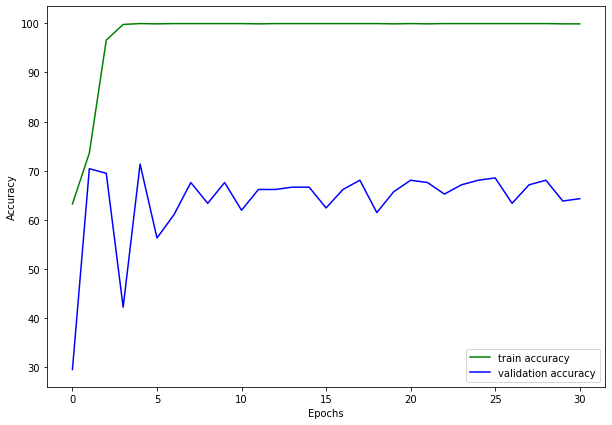

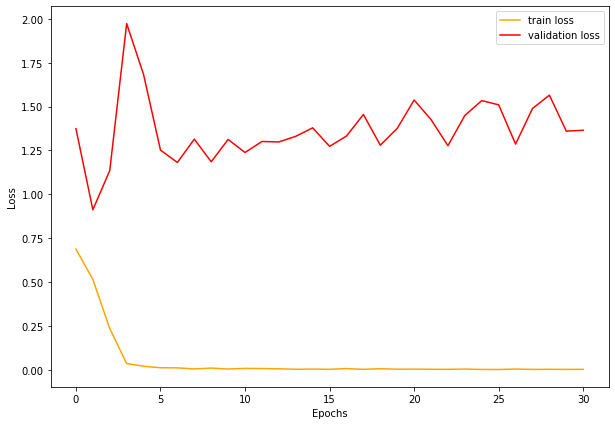

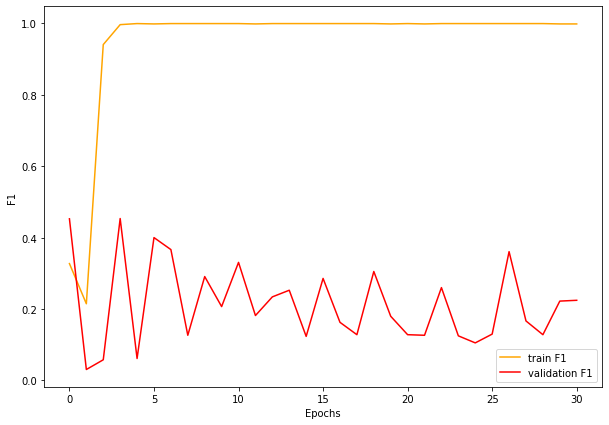

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/accuracy (2).png')
plt.show()
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/loss (2).png')
plt.show()
# F1 plots
plt.figure(figsize=(10, 7))
plt.plot(train_f1, color='orange', label='train F1')
plt.plot(val_f1, color='red', label='validation F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Owen/F1 (2).png')
plt.show()

In [ ]:
inspection_ids = blind_test.inspection_id.unique()
x_blind = blind_test.tensor_path.values
y_blind = blind_test.cracking_binary.values
inspections_x = blind_test.inspection_id.values
inspections_y = blind_test['cracking_binary'].groupby(by=inspections_x).max()

In [ ]:
from sklearn.metrics import f1_score

model.load_state_dict(torch.load("/content/drive/MyDrive/Owen/candidate_model_output/epoch0"))
model.eval
road_truths = []
max_preds = []
mean_preds = []
majority_preds = []
toptwo_preds = []
product_preds = []
for i,inspection in tqdm(enumerate(inspection_ids), total=len(inspection_ids)):
    images_x = x_blind[inspections_x==inspection]
    images_y = y_blind[inspections_x==inspection]
    test_data = prediction_maps(images_x, images_y, tfms=0)
    with torch.no_grad():
       test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)
       for i, data in enumerate(test_dataloader):
         data = data[0].to(device)
         outputs = model(data)
         road_truth = np.amax(images_y)
         max_pred = torch.round(torch.max(outputs.data)).item()
         mean_pred = torch.round(torch.mean(outputs.data)).item()
         majority_pred = torch.round(torch.mean(torch.round(outputs.data))).item()
         product_pred = torch.round(1-torch.prod(1-outputs.data)).item()
         if len(outputs.size())==0:
           top2_pred = torch.round(torch.max(outputs)).item()
         else:
           top2 = torch.topk(outputs, 2).values
           top2_pred = torch.round(torch.mean(top2)).item()
         road_truths.append(road_truth)
         max_preds.append(max_pred)
         mean_preds.append(mean_pred)
         majority_preds.append(majority_pred)
         toptwo_preds.append(top2_pred)
         product_preds.append(product_pred)
f1_max = f1_score(road_truths, max_preds)
f1_mean = f1_score(road_truths, mean_preds)
f1_majority = f1_score(road_truths, majority_preds)
f1_top2 = f1_score(road_truths, toptwo_preds)
f1_product = f1_score(road_truths, product_preds)
print(f1_max, f1_mean, f1_majority, f1_top2,f1_product)







  0%|          | 0/213 [00:00<?, ?it/s]





  1%|          | 2/213 [00:00<00:15, 13.71it/s]





  2%|▏         | 5/213 [00:00<00:13, 15.52it/s]





  4%|▍         | 8/213 [00:00<00:11, 17.69it/s]





  5%|▌         | 11/213 [00:00<00:11, 18.23it/s]





  6%|▌         | 13/213 [00:00<00:11, 17.52it/s]





  8%|▊         | 16/213 [00:00<00:10, 19.51it/s]





  9%|▉         | 19/213 [00:00<00:09, 20.63it/s]





 10%|█         | 22/213 [00:01<00:08, 22.06it/s]





 12%|█▏        | 25/213 [00:01<00:08, 21.27it/s]





 13%|█▎        | 28/213 [00:01<00:08, 22.43it/s]





 15%|█▌        | 32/213 [00:01<00:07, 25.34it/s]





 16%|█▋        | 35/213 [00:01<00:07, 23.99it/s]





 18%|█▊        | 38/213 [00:01<00:07, 24.18it/s]





 19%|█▉        | 41/213 [00:01<00:07, 22.39it/s]





 22%|██▏       | 47/213 [00:01<00:06, 27.54it/s]





 24%|██▍       | 52/213 [00:02<00:05, 27.98it/s]





 27%|██▋       | 57/213 [00:02<00:05, 30.07it/s]





 29%|██▊       | 61/213 [00:02<00:

0.07894736842105264 0.0 0.0 0.05405405405405405 0.4943820224719101


In [ ]:
import sklearn.metrics as metric

print(metric.accuracy_score(road_truths, max_preds))
print(metric.recall_score(road_truths, max_preds))
print(metric.precision_score(road_truths, max_preds))
print(metric.f1_score(road_truths, max_preds))

0.6713615023474179
0.04285714285714286
0.5
0.07894736842105264


In [ ]:
print(metric.confusion_matrix(road_truths, max_preds))

[[140   3]
 [ 67   3]]
